# VIRTUAL-B CLUSTERING
1. Full df
2. Preprocessing
3. Profile clusters
4. Subclusters
5. Investment clusters
6. Subclusters
7. Linking profiles and investments
8. Pivot table
9. Clusters evaluation
10. Client evaluation

In [1]:
# import

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, pairwise_distances
from math import sqrt
from sklearn import preprocessing
from sklearn.cluster import KMeans, k_means
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Full df

In [2]:
df = pd.read_csv('virtualbcluster.csv', error_bad_lines=False, sep=';')
df

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
0,Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000
1,Client2,0.501486,0.062,1.522.847.727,27.327,0.714286,0.152761,0,1,45973,61,0.281602,0.174660,0.153599,0.629258,0.505362,0,2016,0,RM,0.5341,0.4466,0.0124,0.0000,0.0070
2,Client3,0.554108,0.000,9.675.789.154,0.5,0.523810,0.243558,0,0,10233,24,0.124015,0.882995,0.769608,0.663677,0.069924,0,2015,0,BS,0.0000,0.0000,0.0000,0.0000,1.0000
3,Client4,0.440729,0.032,9.563.829.219,25.676,0.619048,0.089571,0,0,25144,46,0.209610,0.548211,0.226218,0.218019,0.415670,0,2015,0,RE,0.6428,0.1220,0.0407,0.1943,0.0002
4,Client5,0.540528,0.038,179.415.327,24.911,0.428571,0.162577,0,0,222892,57,0.320086,0.907644,0.703936,0.506315,0.335057,0,2015,0,MI,0.1707,0.2701,0.5332,0.0045,0.0215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Client4996,0.417480,0.061,3.961.646.057,34.684,0.619048,0.174847,0,0,26348,52,0.285918,0.448543,0.211391,0.564139,0.541309,0,2006,0,CO,0.3792,0.4520,0.0671,0.0830,0.0187
4996,Client4997,0.594193,0.024,1.289.795.979,10.325,0.809524,0.292025,0,1,1002570,45,0.774590,0.284940,0.707348,0.557441,0.577970,0,2016,1,FI,0.9012,0.0283,0.0197,0.0495,0.0012
4997,Client4998,0.577775,0.000,1.548.186.424,0.5,0.523810,0.096933,0,1,31032,43,0.221488,0.524767,0.729378,0.580418,0.421414,0,2016,0,PU,0.0000,0.0000,0.0000,0.0000,1.0000
4998,Client4999,0.402162,0.015,7.22,17.193,0.523810,0.142945,0,0,50243,65,0.320920,0.447410,0.337642,0.117647,0.530526,0,2015,0,SA,0.6541,0.1626,0.1635,0.0000,0.0198


In [3]:
df.describe()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.488939,0.052585,0.619686,0.256095,0.078400,0.505600,1.898872e+05,54.575400,0.338791,0.476238,0.376164,0.417580,0.484838,-0.013200,2014.056400,0.116200,0.498821,0.230302,0.047452,0.040530,0.174540
std,0.130907,0.165766,0.164812,0.174461,0.268827,0.500019,5.234644e+05,17.574325,0.188517,0.259825,0.211200,0.239535,0.199010,0.114142,5.327898,0.320497,0.274451,0.198136,0.094192,0.087306,0.303692
min,0.031131,0.000000,0.047619,0.000000,0.000000,0.000000,1.000000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388924,0.026000,0.523810,0.128834,0.000000,0.000000,2.773650e+04,43.000000,0.215574,0.221779,0.216692,0.145318,0.385020,0.000000,2015.000000,0.000000,0.329475,0.066875,0.000000,0.000000,0.001500
50%,0.476067,0.042000,0.619048,0.216564,0.000000,1.000000,6.696500e+04,54.000000,0.299619,0.476906,0.296553,0.507460,0.519600,0.000000,2015.000000,0.000000,0.533350,0.199150,0.023100,0.000000,0.026900
75%,0.581871,0.059000,0.714286,0.350307,0.000000,1.000000,1.639182e+05,68.000000,0.394999,0.747571,0.616763,0.609014,0.629046,0.000000,2016.000000,0.000000,0.694300,0.348025,0.058000,0.046350,0.159975
max,1.000000,6.060000,1.000000,0.906748,1.000000,1.000000,1.436670e+07,103.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


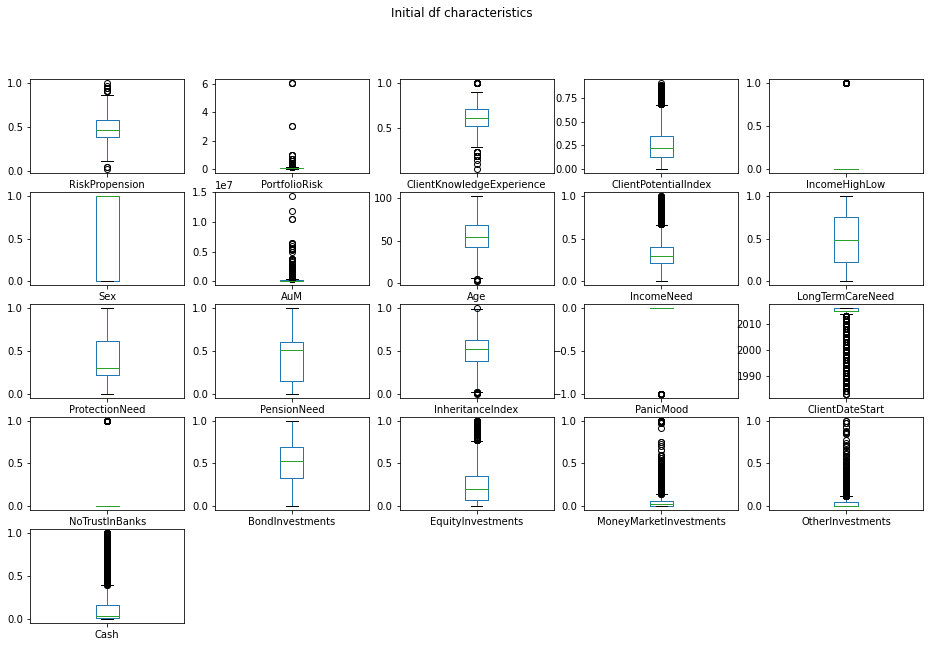

In [4]:
df.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Initial df characteristics');

## Preprocessing

In [5]:
# We want to include spatial data:
df_italia = pd.read_csv('italia.csv', sep=';')
df_italia = df_italia.rename(columns={'Sigla': 'Prov'})
df = pd.merge(df, df_italia, on='Prov')
df.drop(columns=['Prov'], inplace=True)
df.set_index(['ClientID'], inplace=True)
# A few portfolio values are over 1.
df = df.loc[df['PortfolioRisk'] <= 1]
# A few AuM values are magnitudes over the mean.
df = df.loc[df['AuM'] <= 1000000]
# The investment values should sum to one: do they?
df['InvestmentsSum'] = df.EquityInvestments + df.BondInvestments + df.MoneyMarketInvestments + df.OtherInvestments + df.Cash
sum_issue = df.loc[(df.InvestmentsSum < 0.99) | (df.InvestmentsSum > 1.01)] # very tiny differences may be due to approximation errors
# Removing the records where the sum of investments is not 1.
df.append(sum_issue).drop_duplicates(keep=False)
df.describe() # 454 records were cut during preprocessing, corresponding to the 9% of the dataset.

,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,PanicMood,ClientDateStart,NoTrustInBanks,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,InvestmentsSum
ClientID,,,,,,,,,,,,,,,,,,,,,,,,,,
Client1,0.597553,0.088,2.077.883.137,37.027,0.285714,0.148466,0,1,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803,0,2015,0,0.5730,0.4270,0.0000,0.0000,0.0000,Palermo,Sicilia,1.0000
Client19,0.429550,0.070,4.388.907.809,30.047,0.809524,0.269939,0,0,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297,0,2016,0,0.4504,0.3393,0.0163,0.0000,0.1940,Palermo,Sicilia,1.0000
Client652,0.431233,0.076,12.710.579,40.671,0.714286,0.574847,0,1,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422,0,2016,0,0.3897,0.5373,0.0241,0.0000,0.0236,Palermo,Sicilia,0.9747
Client671,0.414649,0.029,1.070.728.631,19.513,0.809524,0.362577,0,1,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2015,0,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,0.9999
Client762,0.337011,0.090,7.03,29.743,0.809524,0.433129,1,1,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988,0,2015,1,0.6181,0.3299,0.0111,0.0000,0.0409,Palermo,Sicilia,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client4260,0.387439,0.043,4.55,30.237,0.809524,0.300000,1,0,418794,89,0.385049,0.207762,0.355693,0.086481,0.536120,0,2015,0,0.5907,0.2585,0.0152,0.1345,0.0012,Caserta,Campania,1.0001
Client4164,0.500773,0.056,1.433.713.919,29.991,0.428571,0.099387,0,1,91733,42,0.205834,0.505807,0.223309,0.722609,0.426143,0,2015,0,0.4866,0.3877,0.0641,0.0490,0.0126,Nuoro,Sardegna,1.0000
Client4519,0.500773,0.056,1.186.579.729,29.991,0.428571,0.099387,0,1,91733,42,0.194632,0.445211,0.233502,0.738858,0.437175,0,2015,0,0.4866,0.3877,0.0641,0.0490,0.0126,Nuoro,Sardegna,1.0000


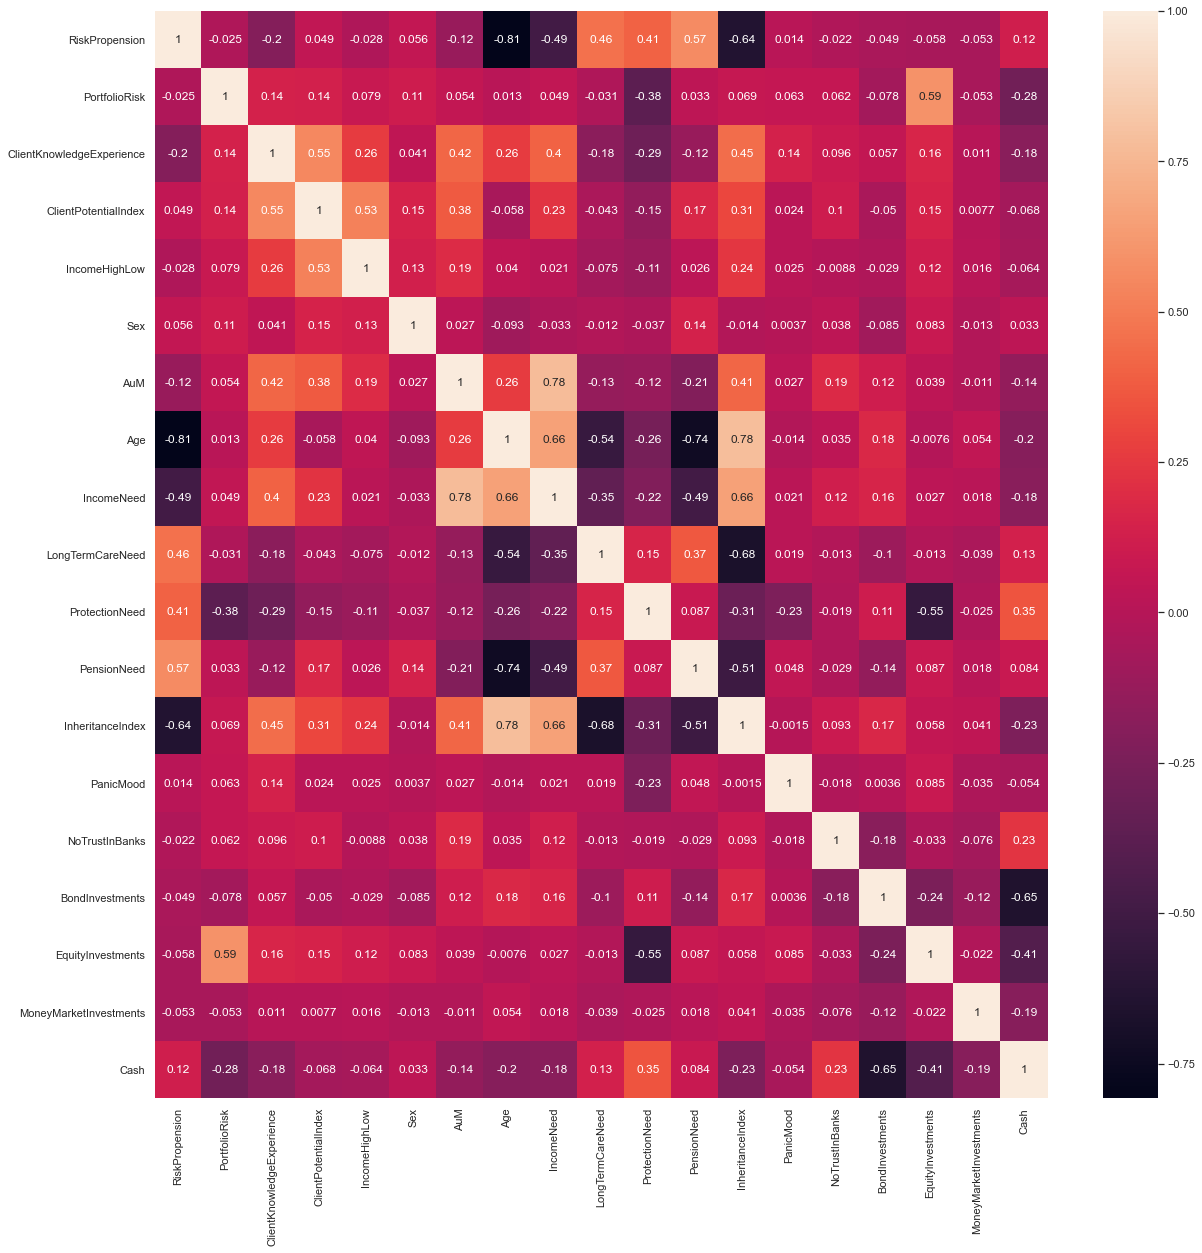

In [4]:
# Are there strong correlations and clear linear combination between attributes?
sns.set(rc={'figure.figsize':(20,20)})
df_corr = df.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','OtherInvestments','Regione','ClientDateStart','Provincia'])
corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## only profile

In [9]:
profiles = df.drop(columns=['ClientInvestmentHorizon','PortfolioHorizon','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash',
                            'Regione','ClientDateStart','Provincia','IncomeHighLow','PanicMood','NoTrustInBanks', 'Sex'])
profiles.head()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex
ClientID,,,,,,,,,,,
Client1,0.597553,0.088,0.285714,0.148466,13719,22,0.079215,0.797512,0.204401,0.633762,0.114803
Client19,0.429550,0.070,0.809524,0.269939,101134,54,0.346486,0.124244,0.216927,0.744537,0.573297
Client652,0.431233,0.076,0.714286,0.574847,42348,52,0.296850,0.143672,0.161196,0.697336,0.636422
Client671,0.414649,0.029,0.809524,0.362577,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461
Client762,0.337011,0.090,0.809524,0.433129,93642,69,0.401974,0.228357,0.243846,0.110424,0.737988


In [10]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()
    

sns.set(rc={'figure.figsize':(20,20)})
fig_num=1
for col in profiles.select_dtypes(include=[np.number]).columns:
    if col in ['RiskPropension','PortfolioRisk','ClientKnowledgeExperience','ClientPotentialIndex','AuM','Age','IncomeNeed','LongTermCareNeed','ProtectionNeed','PensionNeed','InheritanceIndex','BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']:
        #hist_box_plot(profiles, col, fig_num)
        fig_num = fig_num + 1

In [11]:
X_p = profiles.values
X_p = preprocessing.minmax_scale(X_p)

# senza interventi: 3 cluster, ottimizzazione di silhouette: 0.27 e inerzia: 0.00064. La PCA non migliora niente.
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_p)
lab = kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_p)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"])

# Attachine the clusters back to our initial Dataset that has all the data
profiles['Clusters'] = predictions

# display
countscldf

# score
metrics.silhouette_score(X_p, lab, metric='euclidean')

0.2429059518183445

## subclusters

In [12]:
# sub1: 3 cluster, silhouette 0.67. La PCA non aumenta quasi niente.
subprof0 = profiles.loc[profiles['Clusters'] == 0]
X_p_0 = subprof0.values
X_p_0 = preprocessing.normalize(X_p_0)

kmeans0 = KMeans(n_clusters=3, random_state=2)
kmeans0 = kmeans0.fit(X_p_0)

lab = kmeans0.labels_

# "predictions" for new data
predictions0 = kmeans0.predict(X_p_0)

# calculating the Counts of the cluster
unique0, counts0 = np.unique(predictions0, return_counts=True)
counts0 = counts0.reshape(1,3)

# Creating a datagrame
countscldf0 = pd.DataFrame(counts0, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof0['SubClusters'] = predictions0

# display
countscldf0

# score
metrics.silhouette_score(X_p_0, lab, metric='euclidean')

<ipython-input-12-ea3c7931330e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof0['SubClusters'] = predictions0


0.6087534907271505

In [13]:
# sub2: 3 cluster, silhouette 0.68. La PCA non aumenta quasi niente.
subprof1 = profiles.loc[profiles['Clusters'] == 1]
X_p_1 = subprof1.values
X_p_1 = preprocessing.normalize(X_p_1)

kmeans1 = KMeans(n_clusters=3, random_state=2)
kmeans1 = kmeans1.fit(X_p_1)

lab = kmeans1.labels_

# "predictions" for new data
predictions1 = kmeans1.predict(X_p_1)

# calculating the Counts of the cluster
unique1, counts1 = np.unique(predictions1, return_counts=True)
counts1 = counts1.reshape(1,3)

# Creating a datagrame
countscldf1 = pd.DataFrame(counts1, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof1['SubClusters'] = predictions1

# display
countscldf1

# score
metrics.silhouette_score(X_p_1, lab, metric='euclidean')

<ipython-input-13-752d0c2c2fcd>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof1['SubClusters'] = predictions1


0.5697530506394131

In [14]:
# sub3: 3 cluster, silhouette 0.59. La PCA non aumenta quasi niente.
subprof2 = profiles.loc[profiles['Clusters'] == 2]
X_p_2 = subprof2.values
X_p_2 = preprocessing.normalize(X_p_2)

kmeans2 = KMeans(n_clusters=3, random_state=2)
kmeans2 = kmeans2.fit(X_p_2)

lab = kmeans2.labels_

# "predictions" for new data
predictions2 = kmeans2.predict(X_p_2)

# calculating the Counts of the cluster
unique2, counts2 = np.unique(predictions2, return_counts=True)
counts2 = counts2.reshape(1,3)

# Creating a datagrame
countscldf2 = pd.DataFrame(counts2, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof2['SubClusters'] = predictions2

# display
countscldf2

# score
metrics.silhouette_score(X_p_2, lab, metric='euclidean')

<ipython-input-14-8cfc4287fb6c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof2['SubClusters'] = predictions2


0.68012308475214

In [15]:
# sub4: 3 cluster, silhouette 0.59. La PCA non aumenta quasi niente.
subprof3 = profiles.loc[profiles['Clusters'] == 3]
X_p_3 = subprof3.values
X_p_3 = preprocessing.normalize(X_p_3)

kmeans3 = KMeans(n_clusters=3, random_state=2)
kmeans3 = kmeans3.fit(X_p_3)

lab = kmeans3.labels_

# "predictions" for new data
predictions3 = kmeans3.predict(X_p_3)

# calculating the Counts of the cluster
unique3, counts3 = np.unique(predictions3, return_counts=True)
counts3 = counts3.reshape(1,3)

# Creating a datagrame
countscldf3 = pd.DataFrame(counts3, columns = ["SubCluster0","SubCluster1","SubCluster2"])

subprof3['SubClusters'] = predictions3

# display
countscldf3
# score
metrics.silhouette_score(X_p_3, lab, metric='euclidean')

<ipython-input-15-4997a75c7c55>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subprof3['SubClusters'] = predictions3


0.6498510152890165

In [16]:
# after clustering on profiles, attaching investments back to evaluate correlation
prof_sub = pd.concat([subprof0, subprof1, subprof2, subprof3])
df_sub = prof_sub.merge(df[['BondInvestments', 'EquityInvestments', 'MoneyMarketInvestments', 'OtherInvestments', 'Cash', 'Provincia', 'Regione']], left_index=True, right_index=True)
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,Clusters,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione
ClientID,,,,,,,,,,,,,,,,,,,,
Client671,0.414649,0.029,0.809524,0.362577,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
Client2339,0.414649,0.029,0.809524,0.362577,479278,57,0.648650,0.854271,0.256926,0.522295,0.597200,0,2,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia
Client92,0.339149,0.083,0.619048,0.128221,278720,71,0.644808,0.480181,0.264487,0.575356,0.667381,0,0,0.5668,0.3207,0.0176,0.0025,0.0923,Brescia,Lombardia
Client97,0.419929,0.039,0.809524,0.315951,263123,76,0.731677,0.250778,0.362796,0.127377,0.719872,0,0,0.6476,0.2684,0.0622,0.0114,0.0104,Brescia,Lombardia
Client539,0.388553,0.046,0.619048,0.452761,259495,61,0.656898,0.559543,0.259349,0.634306,0.653212,0,0,0.6581,0.2423,0.0270,0.0247,0.0480,Brescia,Lombardia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client3068,0.569760,0.051,0.523810,0.074847,116307,52,0.246029,0.595317,0.132875,0.529165,0.516803,3,0,0.2929,0.5455,0.0744,0.0006,0.0866,Aosta,Valle d'Aosta
Client4349,0.494138,0.034,0.619048,0.055215,47432,60,0.257960,0.560420,0.242482,0.603771,0.495385,3,0,0.7275,0.1990,0.0135,0.0600,0.0000,Aosta,Valle d'Aosta
Client4164,0.500773,0.056,0.428571,0.099387,91733,42,0.205834,0.505807,0.223309,0.722609,0.426143,3,0,0.4866,0.3877,0.0641,0.0490,0.0126,Nuoro,Sardegna


In [17]:
# what's the clusters population?
df_sub.groupby(['Clusters']).RiskPropension.count()

Clusters
0     535
1    1191
2    1168
3    1652
Name: RiskPropension, dtype: int64

In [18]:
# how about clusters properties?
df_sub.groupby(['Clusters']).mean()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
Clusters,,,,,,,,,,,,,,,,,
0,0.447476,0.055269,0.783089,0.425019,497455.168224,64.441121,0.675776,0.394902,0.308344,0.302500,0.670531,1.442991,0.552973,0.260011,0.046481,0.048159,0.086302
1,0.619558,0.041813,0.521650,0.203081,57699.732158,35.259446,0.179896,0.776215,0.520445,0.577662,0.214879,1.355164,0.447816,0.200437,0.040242,0.030232,0.279501
2,0.373285,0.042592,0.603800,0.166308,97279.351027,72.968322,0.384865,0.323131,0.354634,0.116455,0.604137,0.841610,0.549779,0.204799,0.046742,0.049130,0.142484
3,0.493742,0.054025,0.640695,0.282768,85851.399516,51.263317,0.279874,0.393339,0.307696,0.565012,0.516740,0.579903,0.482227,0.266564,0.054689,0.043162,0.140574


In [19]:
df_sub.groupby(['Clusters']).std()

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,SubClusters,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash
Clusters,,,,,,,,,,,,,,,,,
0,0.104626,0.032505,0.110897,0.169474,205682.997852,12.881620,0.171791,0.234600,0.152592,0.214870,0.122486,0.895276,0.205088,0.174632,0.051606,0.061668,0.186418
1,0.102634,0.043857,0.148248,0.103901,73937.880451,11.860564,0.087145,0.113442,0.249918,0.156896,0.127082,0.714064,0.302345,0.199986,0.086069,0.091246,0.361210
2,0.084060,0.030542,0.137995,0.131194,77405.538866,10.153400,0.082315,0.191967,0.127900,0.061606,0.095693,0.494787,0.272816,0.182225,0.075455,0.095872,0.283564
3,0.096460,0.063174,0.151120,0.179552,79891.798353,8.672396,0.080662,0.203567,0.195052,0.117867,0.091143,0.859074,0.257375,0.210948,0.121950,0.091090,0.265700


In [20]:
# what about the subclusters?
df_sub.groupby(['Clusters', 'SubClusters']).RiskPropension.count()

Clusters  SubClusters
0         0               148
          1                 2
          2               385
1         0               167
          1               434
          2               590
2         0               250
          1               853
          2                65
3         0              1102
          1               142
          2               408
Name: RiskPropension, dtype: int64

In [21]:
df_sub.groupby(['Clusters', 'SubClusters']).mean()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.406893       0.054068   
         1                  0.375565       0.028000   
         2                  0.463450       0.055873   
1        0                  0.545970       0.041102   
         1                  0.631949       0.040016   
         2                  0.631272       0.043336   
2        0                  0.348379       0.039180   
         1                  0.384614       0.044356   
         2                  0.320413       0.032569   
3        0                  0.509493       0.052305   
         1                  0.418357       0.049479   
         2                  0.477436       0.060252   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.781853              0.416933   
         1                             0.809524              0.673313   
         2                             0.783426              0.426838   
1        0                             0.499857              0.184850   
         1                             0.492100              0.187193   
         2                             0.549556              0.219929   
2        0                             0.547238              0.108469   
         1                             0.627142              0.187775   
         2                             0.515018              0.107050   
3        0                             0.662821              0.307751   
         1                             0.598592              0.239134   
         2                             0.595588              0.230476   

                                AuM        Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                           
0        0            294436.763514  69.831081    0.602235          0.363298   
         1             52862.500000  73.000000    0.408489          0.514091   
         2            577808.179221  62.324675    0.705435          0.406431   
1        0             14247.766467  41.335329    0.200468          0.756861   
         1             21897.292627  32.509217    0.154335          0.768811   
         2             96334.879661  35.562712    0.192876          0.787139   
2        0             28826.516000  74.472000    0.373398          0.302220   
         1            123770.543962  72.358734    0.388957          0.331306   
         2             12913.523077  75.184615    0.375272          0.296272   
3        0            117784.764973  50.831216    0.284824          0.402168   
         1             11902.640845  54.500000    0.279713          0.367668   
         2             25337.073529  51.303922    0.266558          0.378429   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.307613     0.231890          0.702138   
         1                  0.328504     0.249273          0.774167   
         2                  0.308521     0.329920          0.657842   
1        0                  0.475058     0.577056          0.239873   
         1                  0.529418     0.582816          0.179803   
         2                  0.526690     0.574043          0.233607   
2        0                  0.367465     0.105497          0.570890   
         1                  0.347320     0.118358          0.618434   
         2                  0.401277     0.133631          0.544398   
3        0                  0.320049     0.559754          0.534001   
         1                  0.260268     0.590465          0.475212   
         2                  0.290836     0.570354          0.484572   

                      BondInvestments  EquityInvestments  \
Clusters SubClusters                                

In [22]:
df_sub.groupby(['Clusters', 'SubClusters']).std()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.086333       0.035013   
         1                  0.101674       0.039598   
         2                  0.106887       0.031483   
1        0                  0.094369       0.050720   
         1                  0.091845       0.033132   
         2                  0.103850       0.048469   
2        0                  0.084841       0.029834   
         1                  0.081183       0.029970   
         2                  0.078300       0.037421   
3        0                  0.094524       0.041344   
         1                  0.087072       0.037872   
         2                  0.089592       0.104950   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.094427              0.168303   
         1                             0.134687              0.063770   
         2                             0.116778              0.169521   
1        0                             0.131596              0.100463   
         1                             0.131869              0.086856   
         2                             0.158683              0.113383   
2        0                             0.125535              0.105792   
         1                             0.133140              0.132896   
         2                             0.148903              0.111403   
3        0                             0.145279              0.180150   
         1                             0.163134              0.176218   
         2                             0.149470              0.164716   

                                AuM        Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                           
0        0             68252.150254   9.863965    0.144727          0.219521   
         1              4097.683797   2.828427    0.023906          0.319652   
         2            183464.793111  13.319825    0.172284          0.239229   
1        0              3605.425293  10.309436    0.055596          0.140029   
         1              8762.599776  10.959769    0.060487          0.118921   
         2             89497.799957  12.240181    0.104939          0.099053   
2        0              8246.026952  10.040941    0.056064          0.187298   
         1             74604.688951  10.148211    0.089843          0.193261   
         2              2685.532624   9.888270    0.055117          0.186889   
3        0             80403.902826   8.597182    0.089563          0.207125   
         1              2171.030998   8.079174    0.052608          0.201858   
         2              7850.406317   8.852922    0.059086          0.193047   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.127118     0.175296          0.097333   
         1                  0.111153     0.001894          0.092174   
         2                  0.161738     0.223048          0.128888   
1        0                  0.262252     0.154347          0.129356   
         1                  0.249139     0.163247          0.123773   
         2                  0.245956     0.152957          0.123352   
2        0                  0.107268     0.051642          0.086033   
         1                  0.132669     0.060149          0.096343   
         2                  0.125055     0.099239          0.062806   
3        0                  0.205937     0.114215          0.092061   
         1                  0.145664     0.129194          0.073754   
         2                  0.175418     0.122291          0.080255   

                      BondInvestments  EquityInvestments  \
Clusters SubClusters                                

In [23]:
# coefficiente di variazione
df_sub.groupby(['Clusters', 'SubClusters']).std() / df_sub.groupby(['Clusters', 'SubClusters']).mean()

RiskPropension  PortfolioRisk  \
Clusters SubClusters                                  
0        0                  0.212177       0.647576   
         1                  0.270723       1.414214   
         2                  0.230633       0.563476   
1        0                  0.172847       1.234008   
         1                  0.145336       0.827959   
         2                  0.164509       1.118449   
2        0                  0.243530       0.761450   
         1                  0.211076       0.675667   
         2                  0.244371       1.148973   
3        0                  0.185525       0.790436   
         1                  0.208128       0.765419   
         2                  0.187652       1.741835   

                      ClientKnowledgeExperience  ClientPotentialIndex  \
Clusters SubClusters                                                    
0        0                             0.120773              0.403669   
         1                             0.166378              0.094710   
         2                             0.149061              0.397155   
1        0                             0.263267              0.543482   
         1                             0.267972              0.463993   
         2                             0.288747              0.515543   
2        0                             0.229397              0.975319   
         1                             0.212297              0.707741   
         2                             0.289122              1.040656   
3        0                             0.219183              0.585377   
         1                             0.272529              0.736900   
         2                             0.250962              0.714676   

                           AuM       Age  IncomeNeed  LongTermCareNeed  \
Clusters SubClusters                                                     
0        0            0.231806  0.141255    0.240317          0.604245   
         1            0.077516  0.038746    0.058522          0.621782   
         2            0.317519  0.213717    0.244224          0.588609   
1        0            0.253052  0.249410    0.277331          0.185013   
         1            0.400168  0.337128    0.391922          0.154682   
         2            0.929028  0.344186    0.544076          0.125839   
2        0            0.286057  0.134828    0.150147          0.619741   
         1            0.602766  0.140249    0.230985          0.583329   
         2            0.207963  0.131520    0.146871          0.630802   
3        0            0.682634  0.169132    0.314449          0.515021   
         1            0.182399  0.148242    0.188080          0.549022   
         2            0.309839  0.172558    0.221662          0.510127   

                      ProtectionNeed  PensionNeed  InheritanceIndex  \
Clusters SubClusters                                                  
0        0                  0.413238     0.755944          0.138623   
         1                  0.338362     0.007599          0.119061   
         2                  0.524238     0.676067          0.195926   
1        0                  0.552042     0.267473          0.539268   
         1                  0.470590     0.280101          0.688382   
         2                  0.466984     0.266455          0.528031   
2        0                  0.291914     0.489515          0.150700   
         1                  0.381979     0.508195          0.155786   
         2                  0.311641     0.742630          0.115367   
3        0                  0.643453     0.204045          0.172398   
         1                  0.559670     0.218801          0.155203   
         2                  0.603149     0.214413          0.165620   

                      BondInvestments  EquityInvestments  \
Clusters SubClusters                                       
0        0                   0.385821           0.713132   
         1      

## only investments

In [24]:
def sum_to_one(list):
    new_list = []
    for i in list:
        new_list.append(i/sum(list))
    return new_list

inv = df[['BondInvestments','EquityInvestments','MoneyMarketInvestments','OtherInvestments','Cash']]
inv['BondMoney'] = inv['BondInvestments'] + inv['MoneyMarketInvestments']
inv = inv.drop(columns=['BondInvestments','MoneyMarketInvestments', 'OtherInvestments'])
cols = inv.columns
inv = inv[inv.sum(axis=1) > 0]  # function breaks for sum=0
inv = inv.apply(sum_to_one, axis=1)
inv = pd.DataFrame.from_dict(dict(zip(inv.index, inv.values))).transpose()  # comes out as a Series of lists, needs reformatting.
inv.columns = cols
inv.head()

<ipython-input-24-93ed7d89180c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv['BondMoney'] = inv['BondInvestments'] + inv['MoneyMarketInvestments']


,EquityInvestments,Cash,BondMoney
Client1,0.427000,0.000000,0.573000
Client19,0.339300,0.194000,0.466700
Client652,0.551247,0.024213,0.424541
Client671,0.119129,0.000458,0.880412
Client762,0.329900,0.040900,0.629200


In [25]:
# 3 clusters, silhouette 0.55
I = inv.values
I = preprocessing.normalize(I)

kmeansI = KMeans(n_clusters=3, random_state=2)
kmeansI = kmeansI.fit(I)


lab = kmeansI.labels_

# "predictions" for new data
predictionsI = kmeansI.predict(I)

# calculating the Counts of the cluster
uniqueI, countsI = np.unique(predictionsI, return_counts=True)
countsI= countsI.reshape(1,3)

# Creating a datagrame
countscldfI = pd.DataFrame(countsI, columns = ["ClusterInv 0","ClusterInv 1","ClusterInv 2"])

inv['ClustersInv'] = predictionsI

# display
countscldfI

# score
metrics.silhouette_score(I, lab, metric='euclidean')

0.5514396649081145

## subclusters

In [26]:
Inv0=inv.loc[inv['ClustersInv'] == 0]
Inv1=inv.loc[inv['ClustersInv'] == 1]
Inv2=inv.loc[inv['ClustersInv'] == 2]

Ic0= Inv0.values
Ic1= Inv1.values
Ic2= Inv2.values

Ic0 = preprocessing.normalize(Ic0)
Ic1 = preprocessing.normalize(Ic1)
Ic2 = preprocessing.normalize(Ic2)

In [27]:
# inv1: 3 cluster, silhouette 0.5. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI0 = KMeans(n_clusters=3, random_state=2)
kmeansI0 = kmeansI0.fit(Ic0)


lab = kmeansI0.labels_

# "predictions" for new data
predictionsI0 = kmeansI0.predict(Ic0)

# calculating the Counts of the cluster
uniqueI0, countsI0 = np.unique(predictionsI0, return_counts=True)
countsI0 = countsI0.reshape(1,3)

# Creating a datagrame
countscldfI0 = pd.DataFrame(countsI0, columns = ["SubClusterInv 0","SubClusterInv 1","SubClusterInv 2"])

# display
countscldfI0

# score
metrics.silhouette_score(Ic0, lab, metric='euclidean')

0.5032419069026414

In [28]:
# inv2: 3 cluster, silhouette 0.72. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI1 = KMeans(n_clusters=3, random_state=2)
kmeansI1 = kmeansI1.fit(Ic1)


lab = kmeansI1.labels_

# "predictions" for new data
predictionsI1 = kmeansI1.predict(Ic1)

# calculating the Counts of the cluster
uniqueI1, countsI1 = np.unique(predictionsI1, return_counts=True)
countsI1= countsI1.reshape(1,3)

# Creating a datagrame
countscldfI1 = pd.DataFrame(countsI1, columns = ["Cluster 0","Cluster 1","Cluster 2"])

# display
countscldfI1

# score
metrics.silhouette_score(Ic1, lab, metric='euclidean')

0.7213175874187933

In [29]:
# inv3: 4 cluster, silhouette 0.51. La PCA non ha senso, partiamo con solo 3 attributi.

kmeansI2 = KMeans(n_clusters=4, random_state=2)
kmeansI2 = kmeansI2.fit(Ic2)


lab = kmeansI2.labels_

# "predictions" for new data
predictionsI2 = kmeansI2.predict(Ic2)

# calculating the Counts of the cluster
uniqueI2, countsI2 = np.unique(predictionsI2, return_counts=True)
countsI2= countsI2.reshape(1,4)

# Creating a datagrame
countscldfI2 = pd.DataFrame(countsI2, columns = ["Cluster 0","Cluster 1","Cluster 2","Cluster 3"])

# display
countscldfI2

# score
metrics.silhouette_score(Ic2, lab, metric='euclidean')

0.5114362588906232

In [30]:
Inv0['SubClustersInv']= predictionsI0
Inv1['SubClustersInv']= predictionsI1
Inv2['SubClustersInv']= predictionsI2

Inv_sub = pd.concat([Inv0, Inv1, Inv2])
Inv_sub.head()

<ipython-input-30-fdb6ada9e2b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv0['SubClustersInv']= predictionsI0
<ipython-input-30-fdb6ada9e2b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inv1['SubClustersInv']= predictionsI1
<ipython-input-30-fdb6ada9e2b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,EquityInvestments,Cash,BondMoney,ClustersInv,SubClustersInv
Client671,0.119129,0.000458,0.880412,0,1
Client762,0.329900,0.040900,0.629200,0,0
Client1314,0.003000,0.000000,0.997000,0,1
Client2339,0.119129,0.000458,0.880412,0,1
Client2832,0.003000,0.000000,0.997000,0,1


In [31]:
# what's the cluster population?
Inv_sub.groupby(['ClustersInv']).Cash.count()

ClustersInv
0    2619
1     677
2    1231
Name: Cash, dtype: int64

In [32]:
Inv_sub.groupby(['ClustersInv']).mean()

,EquityInvestments,Cash,BondMoney,SubClustersInv
ClustersInv,,,,
0,0.169117,0.061784,0.769099,0.673540
1,0.058591,0.837498,0.103910,0.584934
2,0.513526,0.055176,0.431298,2.164094


In [33]:
Inv_sub.groupby(['ClustersInv']).std()

,EquityInvestments,Cash,BondMoney,SubClustersInv
ClustersInv,,,,
0,0.110289,0.095035,0.128209,0.660427
1,0.102625,0.209922,0.150944,0.855167
2,0.146078,0.087492,0.149343,0.984784


In [34]:
# how about the subclusters?
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).Cash.count()

ClustersInv  SubClustersInv
0            0                 1138
             1                 1198
             2                  283
1            0                  446
             1                   66
             2                  165
2            0                  128
             1                  128
             2                  389
             3                  586
Name: Cash, dtype: int64

In [35]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).mean()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.272721  0.032114   0.695166
            1                        0.084301  0.035072   0.880627
            2                        0.111546  0.294175   0.594279
1           0                        0.008786  0.978827   0.012387
            1                        0.293713  0.581902   0.124385
            2                        0.099168  0.557720   0.343112
2           0                        0.371748  0.257162   0.371090
            1                        0.837500  0.070556   0.091944
            2                        0.578061  0.030445   0.391494
            3                        0.430888  0.024114   0.544997

In [36]:
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).std()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.051805  0.043902   0.060353
            1                        0.065242  0.048298   0.077093
            2                        0.082660  0.073436   0.084359
1           0                        0.027358  0.054420   0.038691
            1                        0.109910  0.110732   0.081448
            2                        0.077094  0.096867   0.081904
2           0                        0.072380  0.067935   0.083992
            1                        0.111391  0.101054   0.082838
            2                        0.056600  0.042144   0.057125
            3                        0.044010  0.036690   0.041411

In [37]:
# coefficiente di variazione
Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).std() / Inv_sub.groupby(['ClustersInv', 'SubClustersInv']).mean()

EquityInvestments      Cash  BondMoney
ClustersInv SubClustersInv                                        
0           0                        0.189956  1.367097   0.086818
            1                        0.773917  1.377115   0.087543
            2                        0.741039  0.249633   0.141951
1           0                        3.113772  0.055597   3.123630
            1                        0.374211  0.190293   0.654809
            2                        0.777414  0.173684   0.238710
2           0                        0.194703  0.264170   0.226338
            1                        0.133004  1.432260   0.900956
            2                        0.097914  1.384272   0.145917
            3                        0.102139  1.521500   0.075984

In [38]:
# after clustering on investments, attaching investments back to evaluate correlation
df_sub.rename(columns={'Clusters': 'ClustersProf', 'SubClusters': 'SubClustersProf'}, inplace=True)
df_sub = df_sub.merge(Inv_sub[['ClustersInv', 'SubClustersInv']], left_index=True, right_index=True)
df_sub

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Provincia,Regione,ClustersInv,SubClustersInv
Client671,0.414649,0.029,0.809524,0.362577,479278,57,0.630393,0.742026,0.234112,0.484759,0.573461,0,2,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,0,1
Client2339,0.414649,0.029,0.809524,0.362577,479278,57,0.648650,0.854271,0.256926,0.522295,0.597200,0,2,0.5454,0.1040,0.2232,0.1269,0.0004,Palermo,Sicilia,0,1
Client92,0.339149,0.083,0.619048,0.128221,278720,71,0.644808,0.480181,0.264487,0.575356,0.667381,0,0,0.5668,0.3207,0.0176,0.0025,0.0923,Brescia,Lombardia,0,0
Client97,0.419929,0.039,0.809524,0.315951,263123,76,0.731677,0.250778,0.362796,0.127377,0.719872,0,0,0.6476,0.2684,0.0622,0.0114,0.0104,Brescia,Lombardia,0,0
Client539,0.388553,0.046,0.619048,0.452761,259495,61,0.656898,0.559543,0.259349,0.634306,0.653212,0,0,0.6581,0.2423,0.0270,0.0247,0.0480,Brescia,Lombardia,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Client3068,0.569760,0.051,0.523810,0.074847,116307,52,0.246029,0.595317,0.132875,0.529165,0.516803,3,0,0.2929,0.5455,0.0744,0.0006,0.0866,Aosta,Valle d'Aosta,2,2
Client4349,0.494138,0.034,0.619048,0.055215,47432,60,0.257960,0.560420,0.242482,0.603771,0.495385,3,0,0.7275,0.1990,0.0135,0.0600,0.0000,Aosta,Valle d'Aosta,0,0
Client4164,0.500773,0.056,0.428571,0.099387,91733,42,0.205834,0.505807,0.223309,0.722609,0.426143,3,0,0.4866,0.3877,0.0641,0.0490,0.0126,Nuoro,Sardegna,2,3
Client4519,0.500773,0.056,0.428571,0.099387,91733,42,0.194632,0.445211,0.233502,0.738858,0.437175,3,0,0.4866,0.3877,0.0641,0.0490,0.0126,Nuoro,Sardegna,2,3


## predicting investments from profile

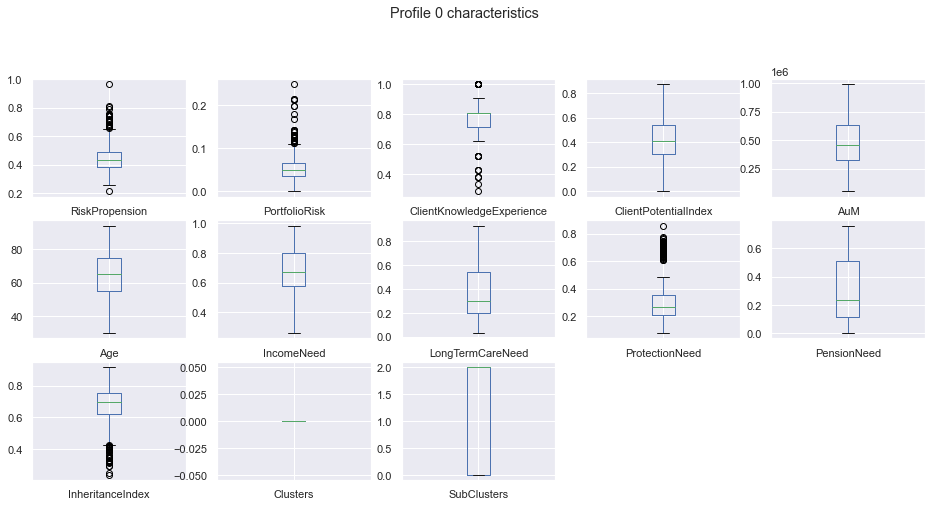

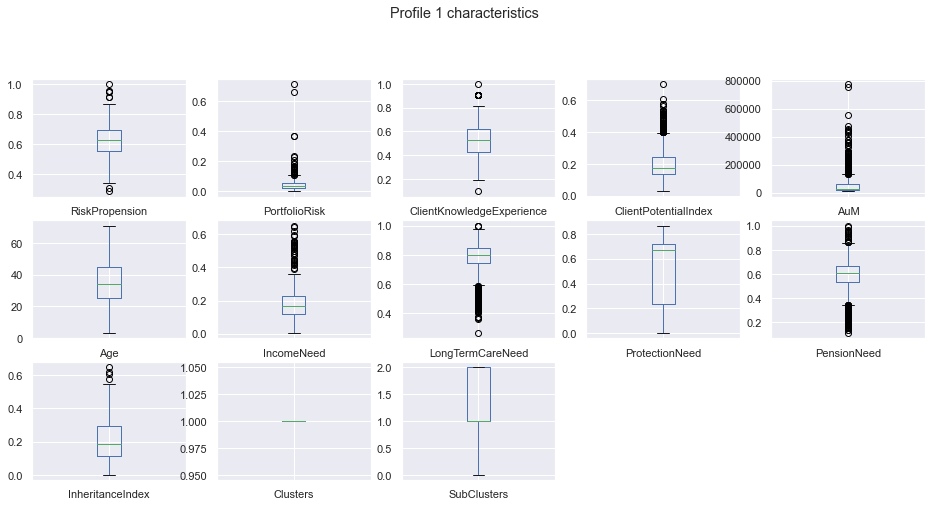

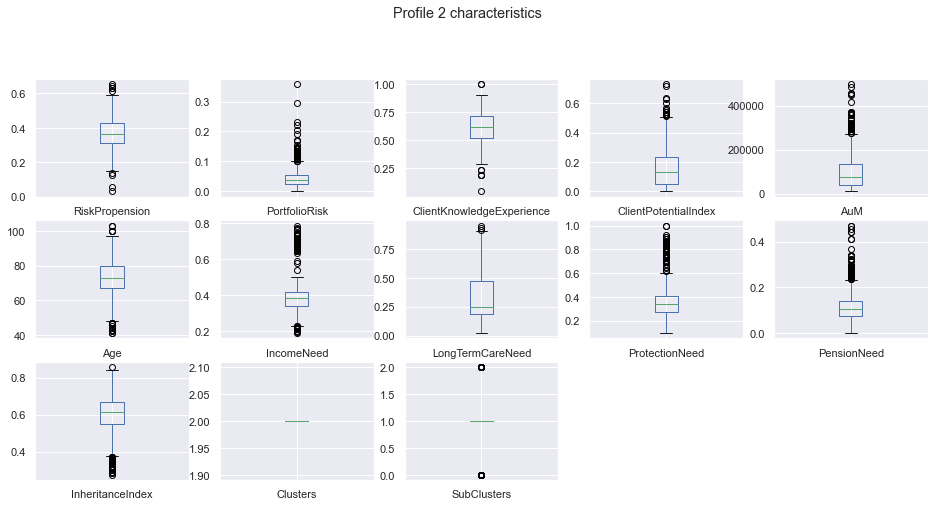

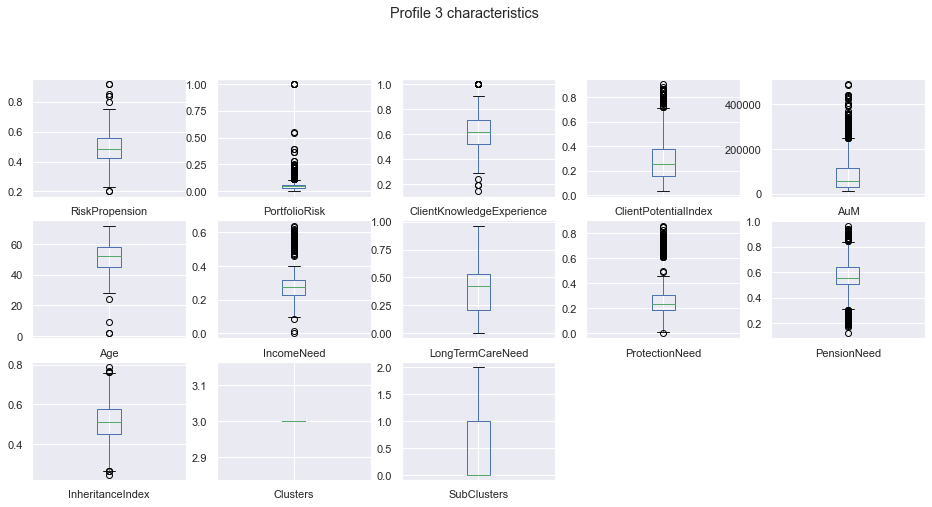

In [39]:
# we are interested in discovering the differences between profile clusters

subprof0.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 0 characteristics');

subprof1.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 1 characteristics');

subprof2.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 2 characteristics');

subprof3.plot(kind='box',
        subplots=True,
        layout=(4,5),
        figsize=(16,10),
        title='Profile 3 characteristics');

# Note. The clusters are two for males and two for females... might be necessary to remove sex from attributes.

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


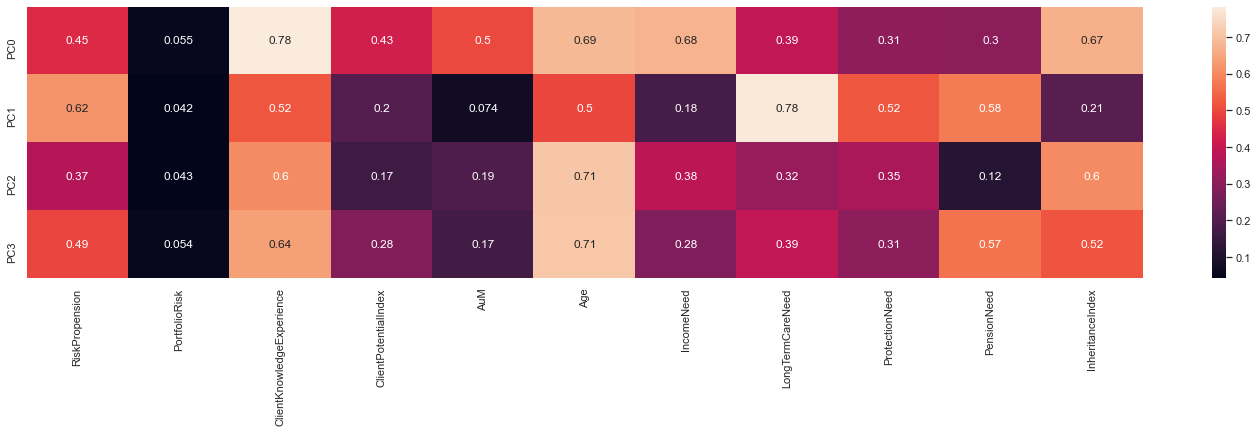

In [40]:
# AuM and Age aren't normalized, many attributes aren't numeric, I'll use the subsets so the whole profile stays as it was
subprof0.AuM = subprof0.AuM / max(subprof0.AuM)
subprof0.Age = subprof0.Age / max(subprof0.Age)
subprof0.drop(columns=['Clusters', 'SubClusters'], inplace=True)

subprof1.AuM = subprof1.AuM / max(subprof1.AuM)
subprof1.Age = subprof1.Age / max(subprof1.Age)
subprof1.drop(columns=['Clusters', 'SubClusters'], inplace=True)

subprof2.AuM = subprof2.AuM / max(subprof2.AuM)
subprof2.Age = subprof2.Age / max(subprof2.Age)
subprof2.drop(columns=['Clusters', 'SubClusters'], inplace=True)

subprof3.AuM = subprof3.AuM / max(subprof3.AuM)
subprof3.Age = subprof3.Age / max(subprof3.Age)
subprof3.drop(columns=['Clusters', 'SubClusters'], inplace=True)

averages = np.zeros(shape=(4,subprof0.shape[1]))
profiles_list = [subprof0, subprof1, subprof2, subprof3]
for i in range(4):
    for j in range(subprof0.shape[1]):
        averages[i, j] = profiles_list[i].values[:, j].mean()
averages = pd.DataFrame(data=averages, index=['PC0', 'PC1', 'PC2', 'PC3'], columns=subprof0.columns)

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(averages, annot=True, ax=ax)

In [41]:
tab_prof = df_sub.reset_index().groupby(['ClustersProf', 'SubClustersProf']).count().unstack()['RiskPropension']
tab_prof

SubClustersProf,0,1,2
ClustersProf,,,
0,148,2,385
1,167,434,590
2,247,850,65
3,1099,142,398


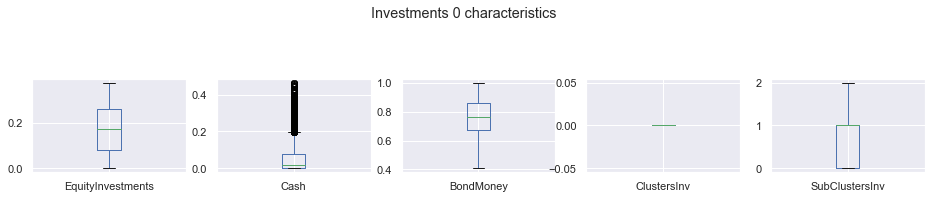

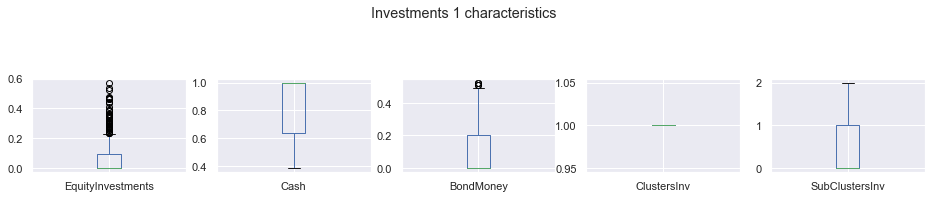

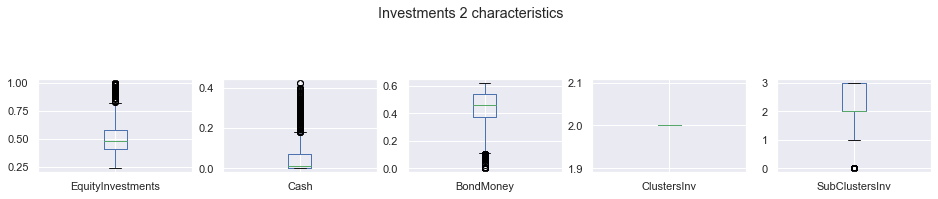

In [42]:
# we are interested in discovering the differences between investments clusters

Inv0.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 0 characteristics');

Inv1.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 1 characteristics');

Inv2.plot(kind='box',
        subplots=True,
        layout=(5,5),
        figsize=(16,10),
        title='Investments 2 characteristics');

C:\Users\emanu\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


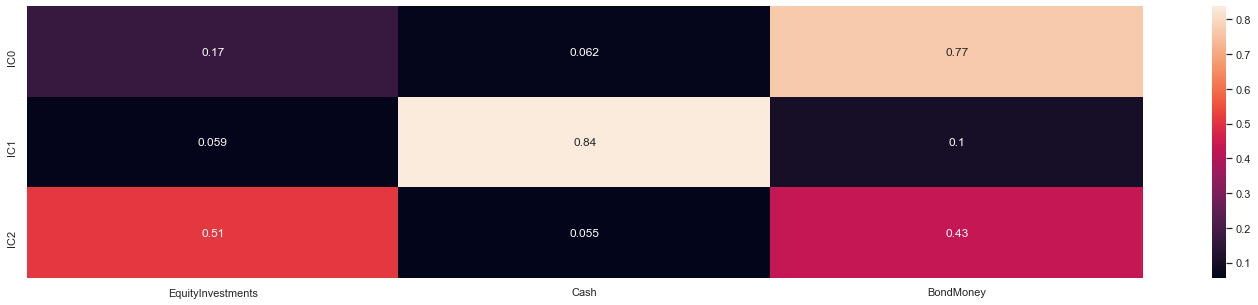

In [43]:
# AuM and Age aren't normalized, many attributes aren't numeric, I'll use the subsets so the whole profile stays as it was
Inv0.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

Inv1.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

Inv2.drop(columns=['ClustersInv', 'SubClustersInv'], inplace=True)

averages = np.zeros(shape=(3, Inv0.shape[1]))
profiles_list = [Inv0, Inv1, Inv2]
for i in range(3):
    for j in range(Inv0.shape[1]):
        averages[i, j] = profiles_list[i].values[:, j].mean()
averages = pd.DataFrame(data=averages, index=['IC0', 'IC1', 'IC2'], columns=Inv0.columns)

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(averages, annot=True, ax=ax)

In [44]:
tab_inv = Inv_sub.reset_index().groupby(['ClustersInv', 'SubClustersInv']).count().unstack()['Cash']
tab_inv

SubClustersInv,0,1,2,3
ClustersInv,,,,
0,1138.0,1198.0,283.0,NaN
1,446.0,66.0,165.0,NaN
2,128.0,128.0,389.0,586.0


## pivot table

In [45]:
pivot = df_sub.groupby(['ClustersProf', 'SubClustersProf', 'SubClustersInv', 'ClustersInv']).count().unstack().unstack()['Cash'].iloc[:, np.r_[0:3, 4:7, 8:12]].fillna(0)
pivot

ClustersInv                       0                  1                 2  \
SubClustersInv                    0      1     2     0     1     2     0   
ClustersProf SubClustersProf                                               
0            0                 54.0   36.0   6.0   4.0   0.0   3.0   1.0   
             1                  0.0    0.0   0.0   1.0   0.0   0.0   0.0   
             2                157.0   99.0  18.0  10.0   5.0   6.0   8.0   
1            0                 18.0   43.0   4.0  45.0   8.0   6.0   4.0   
             1                 73.0   89.0  40.0  87.0  13.0  28.0  19.0   
             2                118.0  153.0  57.0  76.0  11.0  44.0  24.0   
2            0                 41.0  104.0   3.0  39.0   0.0   5.0   5.0   
             1                237.0  281.0  63.0  45.0   9.0  16.0  11.0   
             2                 11.0   21.0   5.0  20.0   0.0   0.0   1.0   
3            0                307.0  253.0  63.0  66.0  14.0  39.0  45.0   
             1                 32.0   34.0   5.0  10.0   2.0   1.0   1.0   
             2                 90.0   85.0  19.0  43.0   4.0  17.0   9.0   

ClustersInv                                       
SubClustersInv                   1      2      3  
ClustersProf SubClustersProf                      
0            0                 5.0   20.0   19.0  
             1                 0.0    0.0    1.0  
             2                 6.0   35.0   41.0  
1            0                 9.0   14.0   16.0  
             1                13.0   28.0   44.0  
             2                 8.0   41.0   58.0  
2            0                 4.0   20.0   26.0  
             1                18.0   64.0  106.0  
             2                 1.0    1.0    5.0  
3            0                26.0  114.0  172.0  
             1                10.0   13.0   34.0  
             2                28.0   39.0   64.0

In [46]:
# let's find out the differences of a particular intersection of clusters with respect to the whole data
def class_diff_whole(prof, subp, inv, subi):
    prof = df_sub[df_sub.ClustersProf == prof]
    subp = prof[prof.SubClustersProf == subp]
    inv = subp[subp.ClustersInv == inv]
    subi = inv[inv.SubClustersInv == subi]
    return subi.describe() - df_sub.describe()

class_diff_whole(3, 0, 0, 0)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
count,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000,-4220.000000
mean,0.013576,0.000470,0.045259,0.047861,-5310.036280,-3.174684,-0.037350,-0.074900,-0.057462,0.131343,0.052144,1.137398,-0.950740,0.093345,0.019164,0.005550,0.014178,-0.137723,-0.693395,-1.065606
std,-0.047169,-0.033201,-0.010956,0.007840,-85658.252981,-9.317694,-0.084629,-0.040237,-0.024658,-0.125889,-0.108540,-1.038854,-0.826005,-0.162809,-0.142211,-0.027287,-0.007130,-0.255028,-0.869835,-1.037681
min,0.296966,0.007000,0.238095,0.035583,20259.000000,29.000000,0.134208,0.059132,0.134830,0.172612,0.301850,3.000000,0.000000,0.102400,0.049300,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.056095,0.011000,0.000000,0.050920,33883.500000,2.500000,0.017197,-0.016172,-0.009452,0.357058,0.096879,2.000000,0.000000,0.215000,0.138050,0.020400,0.000000,-0.000850,0.000000,0.000000
50%,0.030539,0.005000,0.000000,0.053374,39049.000000,-2.000000,-0.019796,-0.065902,-0.064032,0.036431,0.020538,1.000000,-1.000000,0.064200,0.052100,0.018100,0.023000,-0.013000,0.000000,-1.000000
75%,-0.025788,-0.001500,0.095238,0.042945,12725.500000,-9.000000,-0.067437,-0.211766,-0.337833,0.005268,-0.037029,0.000000,-2.000000,-0.026500,-0.053950,0.005400,0.029150,-0.107550,-2.000000,-2.000000
max,-0.268099,-0.893000,0.000000,0.000000,-554413.000000,-35.000000,-0.379436,-0.103510,-0.257528,-0.195374,-0.156999,0.000000,-2.000000,-0.202600,-0.625700,-0.485800,-0.330700,-0.835700,-2.000000,-3.000000


## Client evaluation

In [135]:
# let's now find the differences of a particular client with respect to its intersection of clusters
# TODO: reformat investments attributes like in clustering (drop Other...)
def client_diff_clus(client):
    
    # returns a table with: client values, profile sub-cluster values, difference, and a series of warning where the difference is high.
    
    client = 'Client' + str(client)
    client = pd.DataFrame(df_sub.loc[client]).transpose().drop(columns=['Provincia', 'Regione'])

    prof = df_sub[df_sub.ClustersProf == client.ClustersProf.values[0]]
    subp = prof[prof.SubClustersProf == client.SubClustersProf.values[0]]
    # we only care about profile cluster: people similar to out client, regardless of how they invest.
    #inv  = subp[subp.ClustersInv == client.ClustersInv.values[0]]
    #subi = inv[inv.SubClustersInv == client.SubClustersInv.values[0]]
    
    clusteravg = pd.DataFrame(subp.describe().loc['mean']).transpose().rename(index={'mean':'ClusterAvg'})
    vals = client.append(clusteravg)
    vals.loc['Diff'] = vals.iloc[0] - vals.iloc[1]
    
    # warning if value too distant
    tresholds = {
        'RiskPropension': 0.1,
        'PortfolioRisk': 0.01,
        'ClientKnowledgeExperience': 0.1,
        'ClientPotentialIndex': 0.1,
        'AuM': 10000,
        'Age': 4,
        'IncomeNeed': 0.1,
        'LongTermCareNeed': 0.1,
        'ProtectionNeed': 0.1,
        'PensionNeed': 0.1,
        'InheritanceIndex': 0.1,
        'BondInvestments': 0.1,
        'EquityInvestments': 0.1,
        'MoneyMarketInvestments': 0.1,
        'OtherInvestments': 0.1,
        'Cash': 0.1
    }
    for i in tresholds:
        if vals.loc['Diff', i] < -tresholds[i] or vals.loc['Diff', i] > tresholds[i]:
            print('Warning, the', i, 'of the customer is too distant from the cluster average.')
    print('\nSummary:\n')
    return vals

# let's now find the differences of a particular client with respect to its intersection of clusters
def client_diff_clus_new(client):
    
    # returns a table with: client values, profile sub-cluster values, and a series of warning where the difference is high.
    
    client = 'Client' + str(client)
    client = pd.DataFrame(df_sub.loc[client]).transpose().drop(columns=['Provincia', 'Regione'])

    prof = df_sub[df_sub.ClustersProf == client.ClustersProf.values[0]]
    subp = prof[prof.SubClustersProf == client.SubClustersProf.values[0]]
    # we only care about profile cluster: people similar to out client, regardless of how they invest.
    #inv  = subp[subp.ClustersInv == client.ClustersInv.values[0]]
    #subi = inv[inv.SubClustersInv == client.SubClustersInv.values[0]]
    
    clusteravg = pd.DataFrame(subp.describe().loc['mean']).transpose().rename(index={'mean':'ClusterAvg'})
    clusterstd = pd.DataFrame(subp.describe().loc['std']).transpose().rename(index={'std':'ClusterStd'})
    vals = client.append(clusteravg).append(clusterstd)
    
    # warning if value outside of standard deviations times coefficient of variation from the mean.
    for i in vals.columns:
        try:
            if vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-3*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+3*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is extremely distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-2*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+2*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is very distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is quite distant from the cluster average.')
                
        except:
            pass
    print('\nSummary:\n')
    return vals

client_diff_clus_new(123)

Warning, the IncomeNeed of the customer is quite distant from the cluster average.
Warning, the ProtectionNeed of the customer is very distant from the cluster average.
Warning, the BondInvestments of the customer is very distant from the cluster average.
Warning, the EquityInvestments of the customer is quite distant from the cluster average.

Summary:



,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
Client123,0.548439,0.031,0.714286,0.296933,102180,43,0.190755,0.44756,0.734223,0.571476,0.545965,3,0,0.9929,0,0.0071,0,0,0,1
ClusterAvg,0.509472,0.0523585,0.662507,0.307166,117928,50.8435,0.284885,0.402176,0.320438,0.55964,0.534027,3,0,0.508235,0.258434,0.0457813,0.0466483,0.136204,0.757962,1.12921
ClusterStd,0.0945306,0.0413697,0.145106,0.179637,80458.8,8.58606,0.0895816,0.206816,0.206038,0.114178,0.0918453,0,0,0.237502,0.188603,0.0728485,0.0824843,0.247721,0.913179,1.08963


In [134]:
# let's now find the differences of a particular client with respect to its intersection of clusters
# TODO: reformat investments attributes like in clustering (drop Other...)
def client_diff_clus(client):
    
    # returns a table with: client values, profile sub-cluster values, a difference, and a series of warning where the difference is high.
    
    client = 'Client' + str(client)
    client = pd.DataFrame(df_sub.loc[client]).transpose().drop(columns=['Provincia', 'Regione'])

    prof = df_sub[df_sub.ClustersProf == client.ClustersProf.values[0]]
    subp = prof[prof.SubClustersProf == client.SubClustersProf.values[0]]
    # we only care about profile cluster: people similar to out client, regardless of how they invest.
    #inv  = subp[subp.ClustersInv == client.ClustersInv.values[0]]
    #subi = inv[inv.SubClustersInv == client.SubClustersInv.values[0]]
    
    clusteravg = pd.DataFrame(subp.describe().loc['mean']).transpose().rename(index={'mean':'ClusterAvg'})
    vals = client.append(clusteravg)
    vals.loc['Diff'] = vals.iloc[0] - vals.iloc[1]
    
    # warning if value too distant
    tresholds = {
        'RiskPropension': 0.1,
        'PortfolioRisk': 0.01,
        'ClientKnowledgeExperience': 0.1,
        'ClientPotentialIndex': 0.1,
        'AuM': 10000,
        'Age': 4,
        'IncomeNeed': 0.1,
        'LongTermCareNeed': 0.1,
        'ProtectionNeed': 0.1,
        'PensionNeed': 0.1,
        'InheritanceIndex': 0.1,
        'BondInvestments': 0.1,
        'EquityInvestments': 0.1,
        'MoneyMarketInvestments': 0.1,
        'OtherInvestments': 0.1,
        'Cash': 0.1
    }
    for i in tresholds:
        if vals.loc['Diff', i] < -tresholds[i] or vals.loc['Diff', i] > tresholds[i]:
            print('Warning, the', i, 'of the customer is too distant from the cluster average.')
    print('\nSummary:\n')
    return vals

# let's now find the differences of a particular client with respect to its intersection of clusters
def client_diff_clus_new(client):
    
    # returns a table with: client values, investments sub-cluster values, and a series of warning where the difference is high.
    
    client = 'Client' + str(client)
    client = pd.DataFrame(df_sub.loc[client]).transpose().drop(columns=['Provincia', 'Regione'])

    #prof = df_sub[df_sub.ClustersProf == client.ClustersProf.values[0]]
    #subp = prof[prof.SubClustersProf == client.SubClustersProf.values[0]]
    # we only care about investments cluster: people investing similarly to out client, regardless of their MiFid.
    inv  = df_sub[df_sub.ClustersInv == client.ClustersInv.values[0]]
    subi = inv[inv.SubClustersInv == client.SubClustersInv.values[0]]
    
    clusteravg = pd.DataFrame(subi.describe().loc['mean']).transpose().rename(index={'mean':'ClusterAvg'})
    clusterstd = pd.DataFrame(subi.describe().loc['std']).transpose().rename(index={'std':'ClusterStd'})
    vals = client.append(clusteravg).append(clusterstd)
    
    # warning if value outside of standard deviations times coefficient of variation from the mean.
    for i in vals.columns:
        try:
            if vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-3*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+3*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is extremely distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-2*vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+2*vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is very distant from the cluster average.')
            elif vals.loc[vals.index[0], i] < vals.loc['ClusterAvg', i]-vals.loc['ClusterStd', i] or vals.loc[vals.index[0], i] > vals.loc['ClusterAvg', i]+vals.loc['ClusterStd', i]:
                print('Warning, the', i, 'of the customer is quite distant from the cluster average.')
                
        except:
            pass
    print('\nSummary:\n')
    return vals

client_diff_clus_new(123)

Warning, the ProtectionNeed of the customer is quite distant from the cluster average.
Warning, the ClustersProf of the customer is quite distant from the cluster average.
Warning, the SubClustersProf of the customer is quite distant from the cluster average.
Warning, the BondInvestments of the customer is quite distant from the cluster average.
Warning, the EquityInvestments of the customer is quite distant from the cluster average.

Summary:



,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
Client123,0.548439,0.031,0.714286,0.296933,102180,43,0.190755,0.44756,0.734223,0.571476,0.545965,3,0,0.9929,0,0.0071,0,0,0,1
ClusterAvg,0.485754,0.0343247,0.606447,0.222774,129698,57.727,0.341073,0.447836,0.454632,0.375,0.502548,1.84725,0.934891,0.774263,0.0800074,0.0664664,0.0434336,0.0336087,0,1
ClusterStd,0.129152,0.0233035,0.159594,0.166299,168133,17.4708,0.168852,0.252303,0.197965,0.239807,0.183912,0.988254,0.811839,0.179356,0.0625144,0.154847,0.089966,0.0466504,0,0


## Cluster evaluation

In [132]:
def profile_clus_eval(cluster, subcluster):
    return df_sub.loc[df_sub['ClustersProf']==2].loc[df_sub['SubClustersProf']==1].describe()
profile_clus_eval(2, 1)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,850.0,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,0.384419,0.044513,0.627059,0.187558,123869.292941,72.394118,0.389108,0.330963,0.347260,0.118299,0.618495,2.0,1.0,0.563816,0.219766,0.045248,0.053896,0.114625,0.550588,1.072941
std,0.081122,0.029907,0.133341,0.133075,74714.513432,10.137394,0.089943,0.193319,0.132847,0.060207,0.096458,0.0,0.0,0.243030,0.177478,0.055949,0.092706,0.236861,0.846475,1.003808
min,0.054389,0.000000,0.190476,0.000000,26227.000000,41.000000,0.188863,0.025433,0.093905,0.000000,0.275223,2.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.323526,0.028000,0.523810,0.100000,70425.500000,67.000000,0.341717,0.185039,0.266268,0.076768,0.571607,2.0,1.0,0.423600,0.085050,0.003400,0.000000,0.001625,0.000000,0.000000
50%,0.371931,0.041000,0.619048,0.147853,103394.000000,72.000000,0.383946,0.250556,0.324385,0.109729,0.630345,2.0,1.0,0.598900,0.190650,0.032050,0.019400,0.016450,0.000000,1.000000
75%,0.442127,0.056000,0.714286,0.266871,156893.500000,79.000000,0.415769,0.483956,0.395761,0.142696,0.678122,2.0,1.0,0.732750,0.329650,0.067175,0.069650,0.086550,1.000000,2.000000
max,0.655228,0.359000,1.000000,0.733129,499571.000000,103.000000,0.784054,0.952202,1.000000,0.467652,0.854142,2.0,1.0,1.000000,0.997400,0.588300,0.922800,1.000000,2.000000,3.000000


In [131]:
def investment_clus_eval(cluster, subcluster):
    return df_sub.loc[df_sub['ClustersInv']==cluster].loc[df_sub['SubClustersInv']==subcluster].describe()
investment_clus_eval(2, 1)

,RiskPropension,PortfolioRisk,ClientKnowledgeExperience,ClientPotentialIndex,AuM,Age,IncomeNeed,LongTermCareNeed,ProtectionNeed,PensionNeed,InheritanceIndex,ClustersProf,SubClustersProf,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,ClustersInv,SubClustersInv
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0,128.0
mean,0.491367,0.178258,0.670759,0.313933,87221.250000,51.867188,0.301470,0.472781,0.117533,0.477315,0.473509,2.09375,0.992188,0.082027,0.804885,0.007157,0.033782,0.067786,2.0,1.0
std,0.118069,0.173190,0.154567,0.193586,118885.973483,17.011516,0.142764,0.271946,0.069624,0.230675,0.201680,1.03815,0.827634,0.074687,0.163332,0.014469,0.137818,0.100297,0.0,0.0
min,0.168432,0.000000,0.333333,0.000000,10340.000000,16.000000,0.040935,0.075022,0.000000,0.037026,0.046503,0.00000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000,2.0,1.0
25%,0.404648,0.106000,0.523810,0.152761,16898.000000,39.750000,0.210176,0.210130,0.067968,0.307850,0.353168,1.00000,0.000000,0.000000,0.726425,0.000000,0.000000,0.000150,2.0,1.0
50%,0.491245,0.132000,0.666667,0.276074,36728.500000,51.500000,0.285936,0.467090,0.107159,0.533701,0.526065,2.50000,1.000000,0.094800,0.858850,0.000000,0.000000,0.017750,2.0,1.0
75%,0.581819,0.169000,0.809524,0.469939,104652.500000,64.000000,0.373318,0.756283,0.150564,0.639331,0.631397,3.00000,2.000000,0.141950,0.903875,0.008725,0.000000,0.100500,2.0,1.0
max,0.748404,1.000000,1.000000,0.813497,674917.000000,89.000000,0.897982,0.924709,0.417349,0.865298,0.840165,3.00000,2.000000,0.247900,1.000000,0.078700,0.922800,0.423600,2.0,1.0
